# 04-02-analysis-of-observations-practice

## The general analysis pattern

A typical pattern for **`scikit-learn`** supervised learning classes proceeds as follows:
* Begin with invoking an estimator class, as shown with GaussianNB in the next cell.
* Call the `fit` method with the using the training data (typically called `X`) and the classifications (typically called `y`). This yields a predictor.
* Call the `predict` method on the predictor with test data to obtain its predictions.

In [ ]:
# Example of using a Gaussian Naive Bayes predictions

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

## 1. Regression Diagnostics Problem

The table below shows data from a study of 20 patients with chronic congestive heart failure. Two
measurements are shown — ejection fraction x (in percent), which is a measure of left ventricular
dysfunction, and pulmonary arterial wedge pressure y (in mm Hg).

![](patient_data.JPG)

One value has been mistranscribed from the original paper. Determine which patient’s data is most likely to be wrong.

Hint: The `linear_model` function in the import below helps you perform a linear regression on the data points.
The `mean_squared_error` function helps you determine the overall error.
Dropping the "wrong" patient's data from the set one by one should reduce the mean square error the most!

This is a Regression Diagnostics problem. Whereas a detailed discussion of regression diagnostics is outside our scope, 
the following definitions may be helpful ([source](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/R/R5_Correlation-Regression/R5_Correlation-Regression7.html)):
* **Outliers:** an outlier is defined as an observation that has a large residual. In other words, the observed value for the point is very different from that predicted by the regression model.
* **Leverage points:** A leverage point is defined as an observation that has a value of x that is far away from the mean of x. 
* **Influential observations:** An influential observation is defined as an observation that changes the slope of the line. Thus, influential points have a large influence on the fit of the model. One method to find influential points is to compare the fit of the model with and without each observation.

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

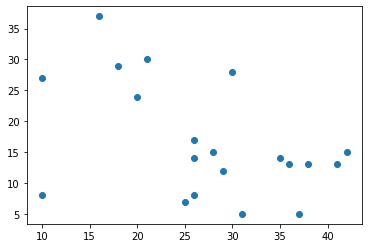

In [80]:
# For your convenience, the two rows of the table are available as Python variables here
x = [int(n) for n in '28 26 42 29 16 21 25 35 30 36 37 41 20 26 38 26 10 18 10 31'.split()]
y = [int(n) for n in '15 14 15 12 37 30 7 14 28 13 5 13 24 8 13 17 27 29 8 5'.split()]

# For your convenience, a look at the data:
noprint = plt.scatter(x, y)

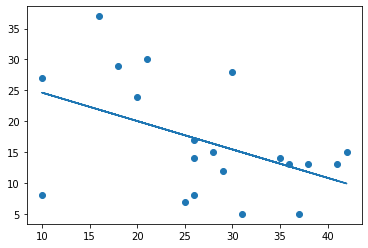

In [46]:
xx = np.array(x)
yy = np.array(y)
X = xx[:, np.newaxis]
model = LinearRegression().fit(X, yy)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit);

In [50]:
def remove_ith(x, index):
    return x[:index] + x[index+1:]

for i in range(len(x)):
    x_remove_ith = remove_ith(x, i)
    y_remove_ith = remove_ith(y, i)
    xx = np.array(x_remove_ith)
    yy = np.array(y_remove_ith)
    XX = xx[:, np.newaxis]
    model = LinearRegression().fit(XX, yy)
    yfit = model.predict(XX)
    print ('%2d Mean squared error: %.2f' % (i, mean_squared_error(x_remove_ith, yfit)))

 0 Mean squared error: 297.58
 1 Mean squared error: 299.39
 2 Mean squared error: 269.66
 3 Mean squared error: 292.01
 4 Mean squared error: 296.94
 5 Mean squared error: 308.29
 6 Mean squared error: 295.73
 7 Mean squared error: 283.21
 8 Mean squared error: 314.95
 9 Mean squared error: 278.54
10 Mean squared error: 255.55
11 Mean squared error: 265.54
12 Mean squared error: 306.44
13 Mean squared error: 294.09
14 Mean squared error: 273.57
15 Mean squared error: 302.12
16 Mean squared error: 291.55
17 Mean squared error: 303.80
18 Mean squared error: 324.97
19 Mean squared error: 276.36


## 2. Bayesian Estimation Problem

The following table indicates data of 10 taxpayers and whether they were audited. Jill's data is shown in row 11. What does a Naive Gaussian Estimate predict about whether Jill will be audited?

| Txid | Refund | Marital Status | Taxable Income | Audit |
|:---:|:------:|:--------------:|:--------------:|:-----:|
| 1   | Yes    | Single         | 125K           | No    |
|2 | No | Married | 100K | No
|3 | No | Single | 70K | No
|4 | Yes | Married | 120K | No
|5 | No | Divorced | 95K | Yes
|6 | No | Married | 60K | No
|7 | Yes | Divorced | 220K | No
|8 | No | Single | 85K  |Yes
|9 | No | Married | 75K | No
|10 | No | Single | 90K | Yes
|11 | Yes | Divorced | 80K | ??

In [76]:
tbl = '''
1	Yes	Single	125K	No
2	No	Married	100K	No
3	No	Single	70K	No
4	Yes	Married	120K	No
5	No	Divorced	95K	Yes
6	No	Married	60K	No
7	Yes	Divorced	220K	No
8	No	Single	85K	Yes
9	No	Married	75K	No
10	No	Single	90K	Yes
'''
rows = tbl.split('\n')
rows
lofl = []
audit = []
for row in rows:
    l2 = row.split()
    if (len(l2)):
        l1 = [1 if l2[1]=='Yes' else 0, 
              1 if l2[2] == 'Single' else 0,
              1 if l2[2] == 'Married' else 0,
              1 if l2[2] == 'Divorced' else 0, 
              int(l2[3][:-1])*1000]
        lofl.append(l1)
        audit.append(1 if l2[4]=='Yes' else 0)
np.array(lofl)

array([[     1,      1,      0,      0, 125000],
       [     0,      0,      1,      0, 100000],
       [     0,      1,      0,      0,  70000],
       [     1,      0,      1,      0, 120000],
       [     0,      0,      0,      1,  95000],
       [     0,      0,      1,      0,  60000],
       [     1,      0,      0,      1, 220000],
       [     0,      1,      0,      0,  85000],
       [     0,      0,      1,      0,  75000],
       [     0,      1,      0,      0,  90000]])

In [78]:
XX_train = np.array(lofl)
gnb = GaussianNB()
audit_pred = gnb.fit(XX_train, audit).predict(np.array([1, 0, 0, 1, 80000]).reshape(1, -1))
audit_pred

array([0])